<a href="https://colab.research.google.com/github/Bhagyasrisatya7/Supermart-Grocery-Sales/blob/main/Grocery_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [ ]:
df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')
df['year'] = df['Order Date'].dt.year

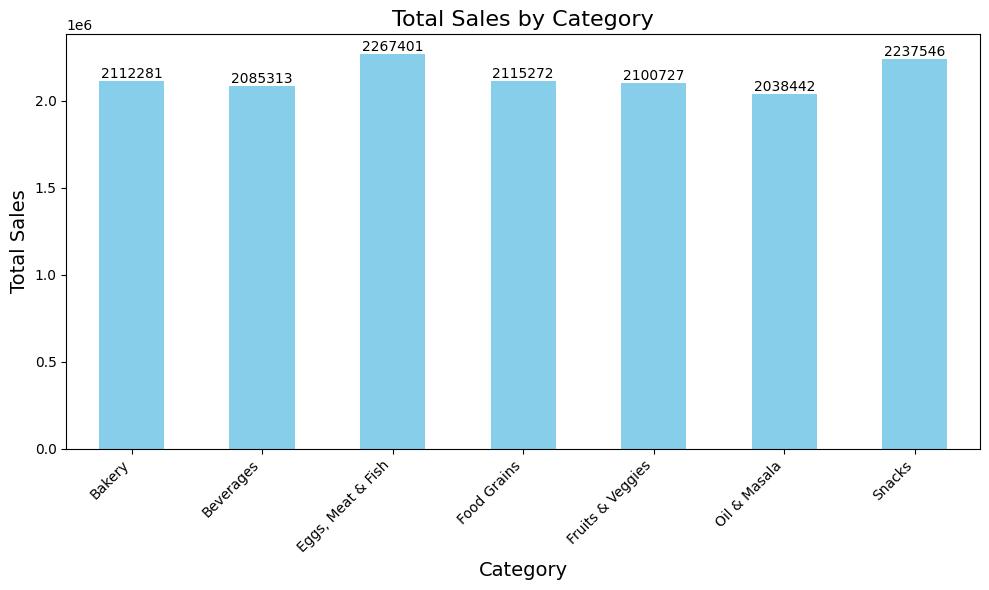

In [ ]:
sales_category = df.groupby("Category")["Sales"].sum()
plt.figure(figsize=(10, 6))
bars = sales_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.tight_layout()
plt.show()

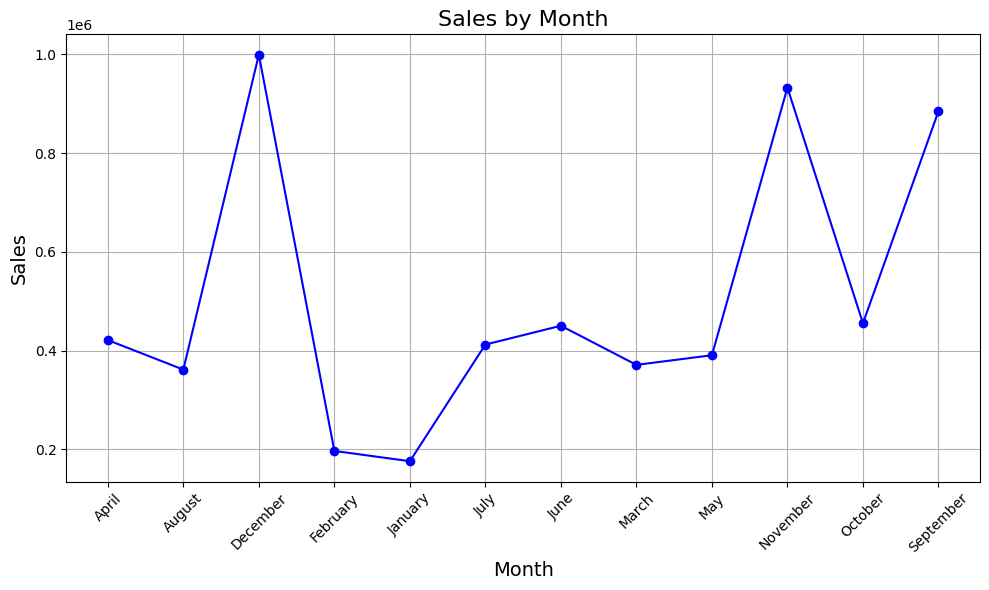

In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales_sorted = monthly_sales.sort_values(by='Month')
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Month'], monthly_sales_sorted['Sales'], marker='o', color='b')
plt.title('Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

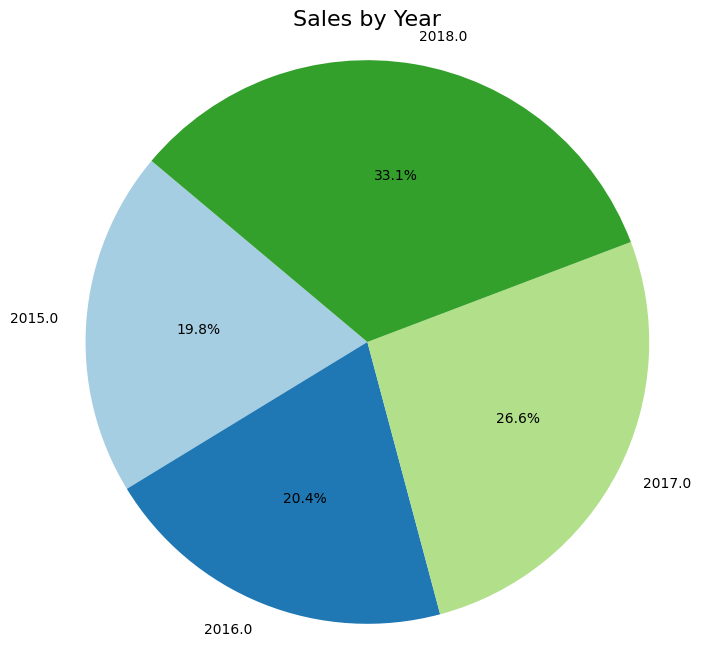

In [ ]:
yearly_sales = df.groupby("year")["Sales"].sum()
plt.figure(figsize=(8, 8))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sales by Year', fontsize=16)
plt.axis('equal')
plt.show()

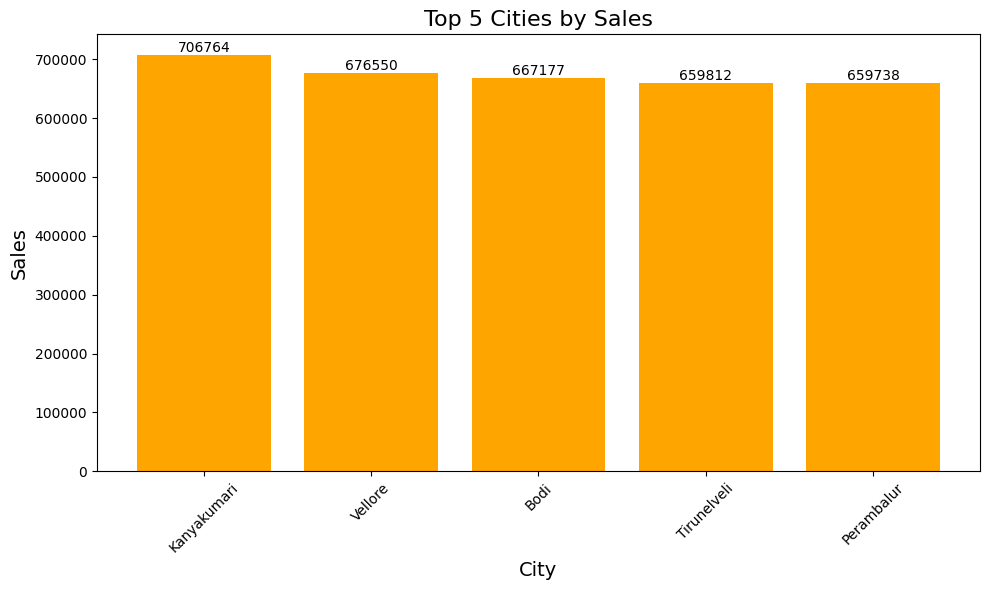

In [ ]:
top_cities = df.groupby('City')["Sales"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_cities.index, top_cities.values, color='orange')
plt.xlabel('City', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Top 5 Cities by Sales', fontsize=16)
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
y_true = df['Sales'][:100]
y_pred = y_true + np.random.normal(0, 100, size=len(y_true))  # Adding random noise for demo

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 8678.300772701677
Mean Absolute Error: 73.04073482757248
R-squared Score: 0.971398259074341
